# Task 2: Exploring Supervised Machine Learning

### Linear Regression

Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable. For example, a modeler might want to relate the weights of individuals to their heights using a linear regression model.

### Importing Libraries 

In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

### Loading Data

In [3]:
# Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Getting Insights of data

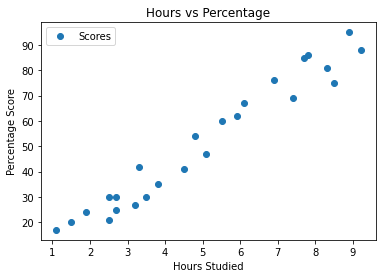

In [4]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the above graph we conclude that the data (hours,marks) are related to each other a linear relationshsip and also that a simple linear regression can can be used as our model to predict.

### Preparing Data

In [5]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

In [6]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=42) 

### Importing Linear regression model

In [7]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  

In [9]:
regressor.fit(X_train, y_train) 
print("Training complete.")

Training complete.


### Ploting regression line

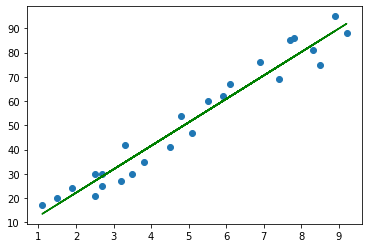

In [10]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line, color="Green");
plt.show()

### Predicting our Test data

In [11]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores
print(y_pred)

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]
[83.18814104 27.03208774 27.03208774 69.63323162 59.95115347]


### Comaparing Actual and Predicted data

In [12]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


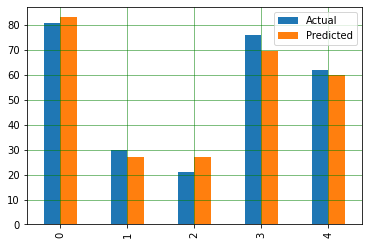

In [13]:
df.head(25)
df.plot(kind='bar',)
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.show()

### Predicting an inputed value

In [16]:
# You can also test with your own data
hours = float(input("ENter the value : "))
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

ENter the value :  7.345


No of Hours = 7.345
Predicted Score = 73.94175639837682


In [17]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 3.9207511902099244
